In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Quantile 正規化を行い、各サンプルの統計的特徴を一致させて分析する

https://en.wikipedia.org/wiki/Quantile_normalization

In [2]:
data_table=pd.read_csv('dataset/elegant-scipy/data/counts.txt.bz2',index_col=0)

In [3]:
counts=data_table.values

In [4]:
counts.shape

(20500, 375)

In [10]:
log_count=np.log(counts+1)

## 何も変換しない場合のkde

In [14]:
from scipy import  stats

# col (サンプルごと)のkdeを出力する
def plot_col_density(data):
    dens_per_col=[stats.gaussian_kde(col) for col in data.T]
    x=np.linspace(np.min(data),np.max(data),100)
    
    fig,ax=plt.subplots()
    for density in dens_per_col:
        ax.plot(x,density(x))

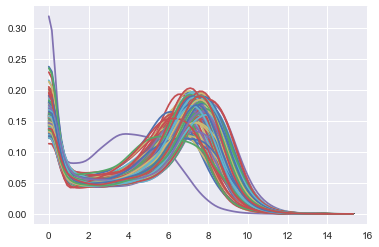

In [15]:
plot_col_density(log_count)

サンプルごとのkdeはバラバラである

In [95]:
from scipy import  stats

def quantile_norn(X):
    quantiles=np.mean(np.sort(X,axis=0),axis=1)
    # 行ごとにデータの大きさの順位を出力する
    ranks=np.apply_along_axis(stats.rankdata,0,X)
    # indexに変換
    rank_index=ranks.astype(int)-1
   
    # indexから平均値に置き換え
    Xn=quantiles[rank_index]
    
    return Xn

In [96]:
log_count_normed=quantile_norn(log_count)

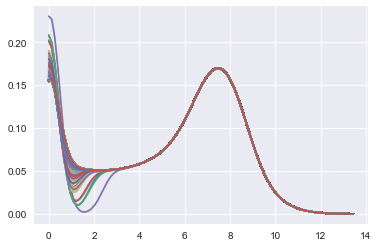

In [97]:
plot_col_density(log_count_normed)

ほぼ一致する

# 類似している遺伝子を見つける

TODO BiClustering

# 患者の寿命の予測

In [101]:
patients=pd.read_csv('./dataset/elegant-scipy/data/patients.csv',index_col=0)

In [103]:
patients.head()

,UV-signature,original-clusters,melanoma-survival-time,melanoma-dead
TCGA-BF-A1PU,UV signature,keratin,NaN,NaN
TCGA-BF-A1PV,UV signature,keratin,13.0,0.0
TCGA-BF-A1PX,UV signature,keratin,NaN,NaN
TCGA-BF-A1PZ,UV signature,keratin,NaN,NaN
TCGA-BF-A1Q0,not UV,immune,17.0,0.0


TODO